# EDA

## Importar las librerías necesarias.

In [8]:
import pandas as pd 
import numpy as np
from datetime import datetime
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

## Cargar los datos

In [9]:
df = pd.read_csv('accidentes_etl.csv')

# Mostramos los datos.
df.sample(1)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
3944,3944,1995-01-10,NaN,"Off Flores Island, Inodnesia",Merpati Nusantara Airlines,6715,Bima - Ruteng,de Havilland Canada DHC-6 Twin Otter 300,PK-NUK,390,14.0,10.0,4.0,14.0,14.0,4.0,0.0,The aircraft disappeared while en route from B...


### **Diccionario de datos:**
- ***Unnamed: 0:*** Número de identificación o índice para cada registro de accidente de vuelo
- ***fecha:*** Fecha en la que ocurrió el accidente de vuelo
- ***HORA declarada:*** Hora declarada del accidente aéreo
- ***Ruta:*** Ubicación geográfica donde ocurrió el accidente de vuelo
- ***OperadOR:*** Compañía aérea operadora del vuelo
- ***flight_no:*** Número de vuelo
- ***route:*** Ruta del vuelo, indicando los puntos de partida y destino
- ***ac_type:*** Tipo de aeronave involucrada en el accidente
- ***registration:*** Número de registro o matrícula de la aeronave
- ***cn_ln:*** Número de serie de la aeronave
- ***all_aboard:*** Total de personas a bordo (pasajeros y tripulación)
- ***PASAJEROS A BORDO:*** Total de pasajeros a bordo
- ***crew_aboard:*** Total de tripulación a bordo
- ***cantidad de fallecidos:*** Total de personas fallecidas en el accidente (pasajeros y tripulación)
- ***passenger_fatalities:*** Total de pasajeros fallecidos en el accidente
- ***crew_fatalities:*** Total de tripulantes fallecidos en el accidente
- ***ground:*** Total de personas en tierra fallecidas en el accidente
- ***summary:*** Resumen del accidente de vuelo y las circunstancias asociadas

## Colecta y validación de datos

### Tipo de dato de las variables

In [10]:
# Listamos los tipo de datos
df.dtypes

Unnamed: 0                  int64
fecha                      object
HORA declarada            float64
Ruta                       object
OperadOR                   object
flight_no                  object
route                      object
ac_type                    object
registration               object
cn_ln                      object
all_aboard                float64
PASAJEROS A BORDO         float64
crew_aboard               float64
cantidad de fallecidos    float64
passenger_fatalities      float64
crew_fatalities           float64
ground                    float64
summary                    object
dtype: object

### Cantidad de variables, según cada tipo de dato

In [11]:
df.dtypes.value_counts()

object     9
float64    8
int64      1
Name: count, dtype: int64

### Cantidad de variables y observaciones

In [12]:
df.shape

(5008, 18)

### Cantidad de observaciones con valores nulos por variable

In [13]:
# Calculamos en número de celdas vacías en cada colummna.
datos_faltantes = df.isnull().sum().to_frame()
datos_faltantes = datos_faltantes.rename(columns= {0: " Celdas Vacías"})
datos_faltantes

,Celdas Vacías
Unnamed: 0,0
fecha,0
HORA declarada,1514
Ruta,5
OperadOR,10
flight_no,3682
route,1011
ac_type,14
registration,272
cn_ln,667


### Cantidad de valores nulos en total

In [14]:
df.isnull().sum().sum()

7986

### Proporción de valores nulos por cada variable

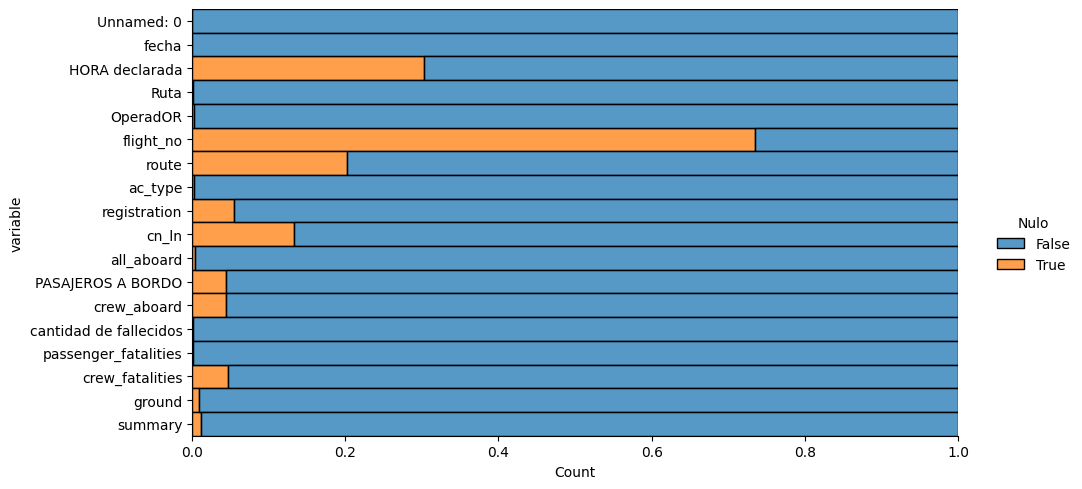

In [15]:
missing_data = df.isnull().stack().reset_index().rename(columns={"level_1": "variable", 0: "Nulo"})
sns.displot(data=missing_data, y="variable", hue="Nulo", multiple="fill", aspect=2)

### Visualizar los valores nulos en todo el conjunto de datos

<Axes: >

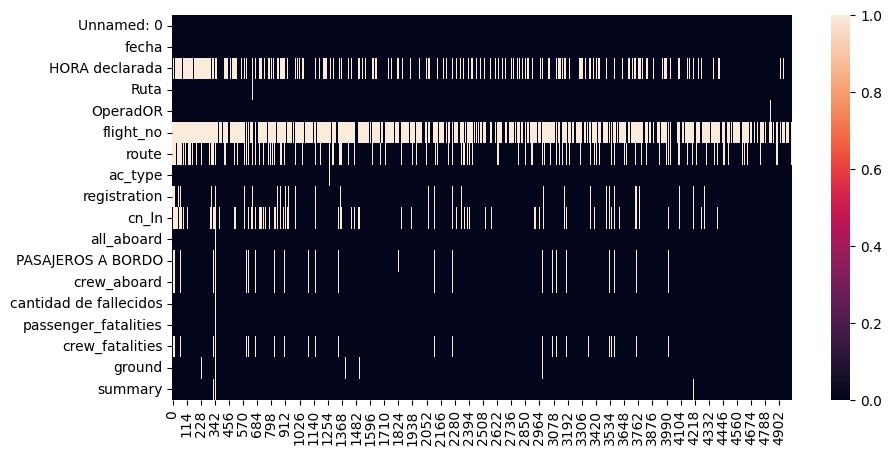

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.isnull().transpose(), ax=ax)

### Visualizamos la correlación de nulidad entre las variables.

<Axes: >

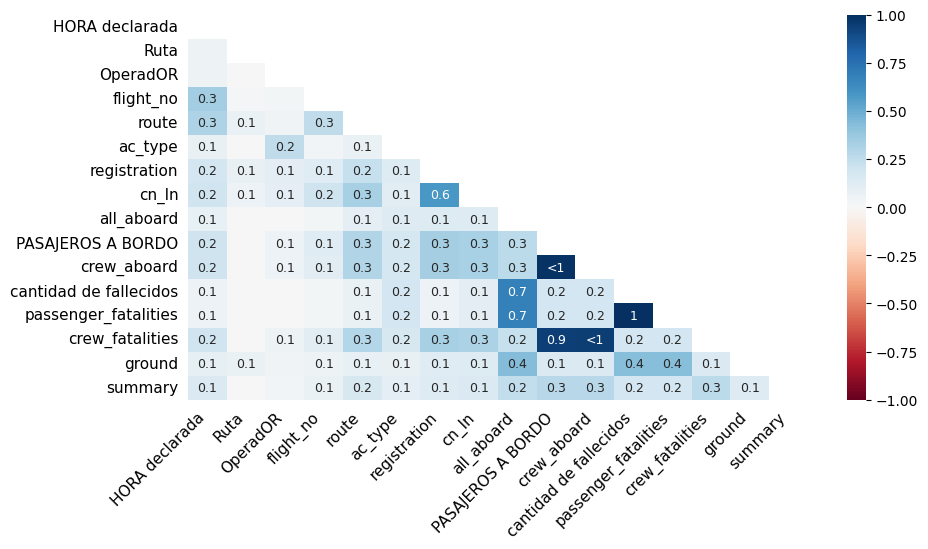

In [17]:
msno.heatmap(df, figsize=(10,5), fontsize=11)

### Eliminamos los valores nulos

In [18]:
# % valores nulos de la columna 'flight_no'
porcentaje_nulos = (df['flight_no'].isnull().sum() / df.shape[0]) * 100
porcentaje_nulos = round(porcentaje_nulos, 2)
print("Porcentaje de valores nulos de la columna 'flight_no':", porcentaje_nulos,'%')

Porcentaje de valores nulos de la columna 'flight_no': 73.52 %


In [19]:
# La columna 'flight_no' tiene más del 70% valores nulos y 'Unnamed: 0' no genera valor en la data
df = df.drop(['Unnamed: 0', 'flight_no'], axis=1)

### Cantidad de filas duplicadas

In [20]:
duplicados = df.duplicated(keep=False).sum()
print('Cantidad de filas duplicadas:', duplicados)
df.shape

Cantidad de filas duplicadas: 0


(5008, 16)

### JOINEANDO DATASET

In [21]:
# Cargar la tabla 'ac_type_clasificacion.csv' en un DataFrame
df_ac_type_clasificacion = pd.read_csv('ac_type_clasificacion.csv')

# Unir los dataframe
df = pd.merge(df, df_ac_type_clasificacion, on='ac_type', how='left')
df.sample(1)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,ac_type_clasif1,ac_type_clasif2
953,1947-03-17,8.0,"Near Medellin, Colombia",TACA,"Medellin, Colombia - San Jose, Costa Rica",Lockheed 18 Lodestar,YS-28,2450,8.0,5.0,3.0,8.0,8.0,3.0,0.0,Crashed shortly after taking off. Hit the slop...,Avión de transporte y pasajeros,Avión


In [22]:
# Cargar la tabla 'ac_type_clasificacion.csv' en un DataFrame
df_Ruta_lon_lat_pais_cont = pd.read_csv('Ruta_lon_lat_pais_cont.csv')

# Unir los dataframe
df = pd.merge(df, df_Ruta_lon_lat_pais_cont, on='Ruta', how='left')
df.sample(1)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,...,passenger_fatalities,crew_fatalities,ground,summary,ac_type_clasif1,ac_type_clasif2,Ruta_lat,Ruta_lon,Ruta_pais,Ruta_continente
686,1943-07-28,22.0,"Trammel, Kentucky",American Airlines,Cleveland - Memphis,Douglas DC-3,NC16014,1552,22.0,18.0,...,20.0,4.0,0.0,The aircraft crashed into trees while attempti...,Avión militar,Avión,36.9169,-88.9973,United States,Americas


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   5008 non-null   object 
 1   HORA declarada          3494 non-null   float64
 2   Ruta                    5003 non-null   object 
 3   OperadOR                4998 non-null   object 
 4   route                   3997 non-null   object 
 5   ac_type                 4994 non-null   object 
 6   registration            4736 non-null   object 
 7   cn_ln                   4341 non-null   object 
 8   all_aboard              4991 non-null   float64
 9   PASAJEROS A BORDO       4787 non-null   float64
 10  crew_aboard             4789 non-null   float64
 11  cantidad de fallecidos  5000 non-null   float64
 12  passenger_fatalities    5000 non-null   float64
 13  crew_fatalities         4773 non-null   float64
 14  ground                  4964 non-null   

## Análisis General

### **Análisis Univariado**
### - Numéricas:

In [24]:
descripcion = df.describe().round(2).applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else x)
descripcion

,HORA declarada,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,Ruta_lat,Ruta_lon
count,3494.00,4991.00,4787.00,4789.00,5000.00,5000.00,4773.00,4964.00,4940.00,4940.00
mean,12.66,31.12,26.88,4.52,22.29,22.29,3.59,1.72,26.62,-5.36
std,5.99,45.48,44.04,3.76,35.00,35.00,3.18,55.50,24.56,81.80
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-77.53,-177.38
25%,8.00,7.00,3.00,2.00,4.00,4.00,2.00,0.00,10.38,-76.63
50%,13.00,16.00,12.00,4.00,11.00,11.00,3.00,0.00,33.98,2.50
75%,17.00,35.00,30.00,6.00,25.00,25.00,5.00,0.00,44.13,49.22
max,23.00,644.00,614.00,83.00,583.00,583.00,43.00,2750.00,82.50,179.20


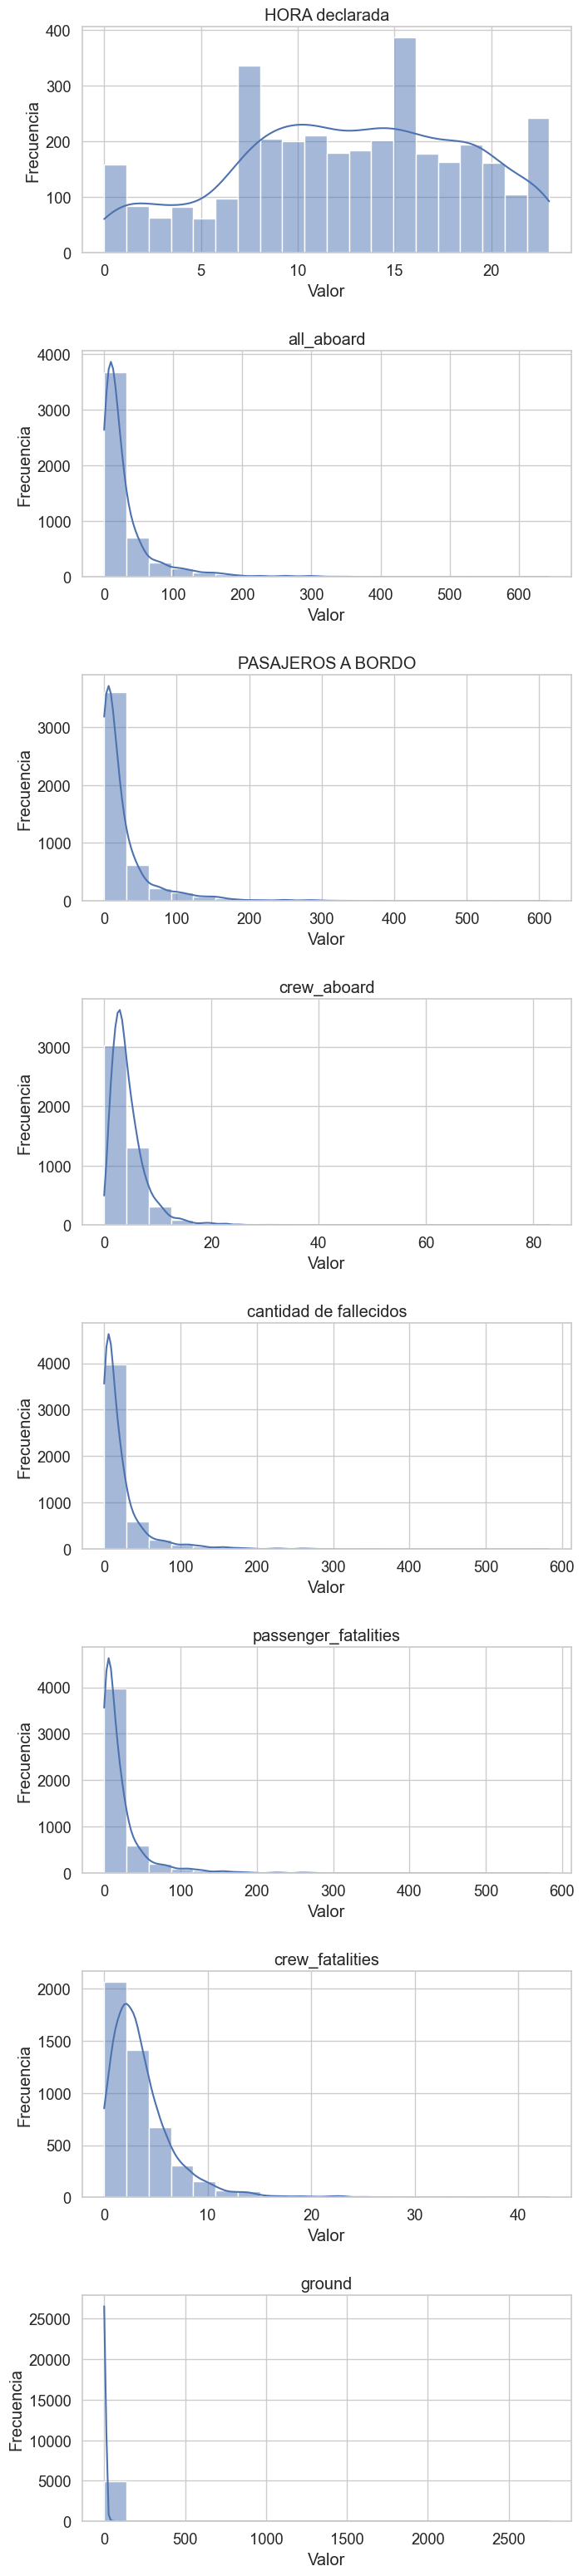

In [25]:
# Variables numéricas
numeric_variables = ['HORA declarada', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard',
                     'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes para el subplot
fig, axs = plt.subplots(len(numeric_variables), 1, figsize=(8, len(numeric_variables)*4))
fig.tight_layout(pad=4)

# Generar gráficos univariados para cada variable
for i, variable in enumerate(numeric_variables):
    # Seleccionar el eje correspondiente
    ax = axs[i]
    
    # Graficar histograma con Seaborn
    sns.histplot(data=df, x=variable, bins=20, kde=True, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

# Mostrar el subplot
plt.show()

#### Diagrama de caja / boxplot

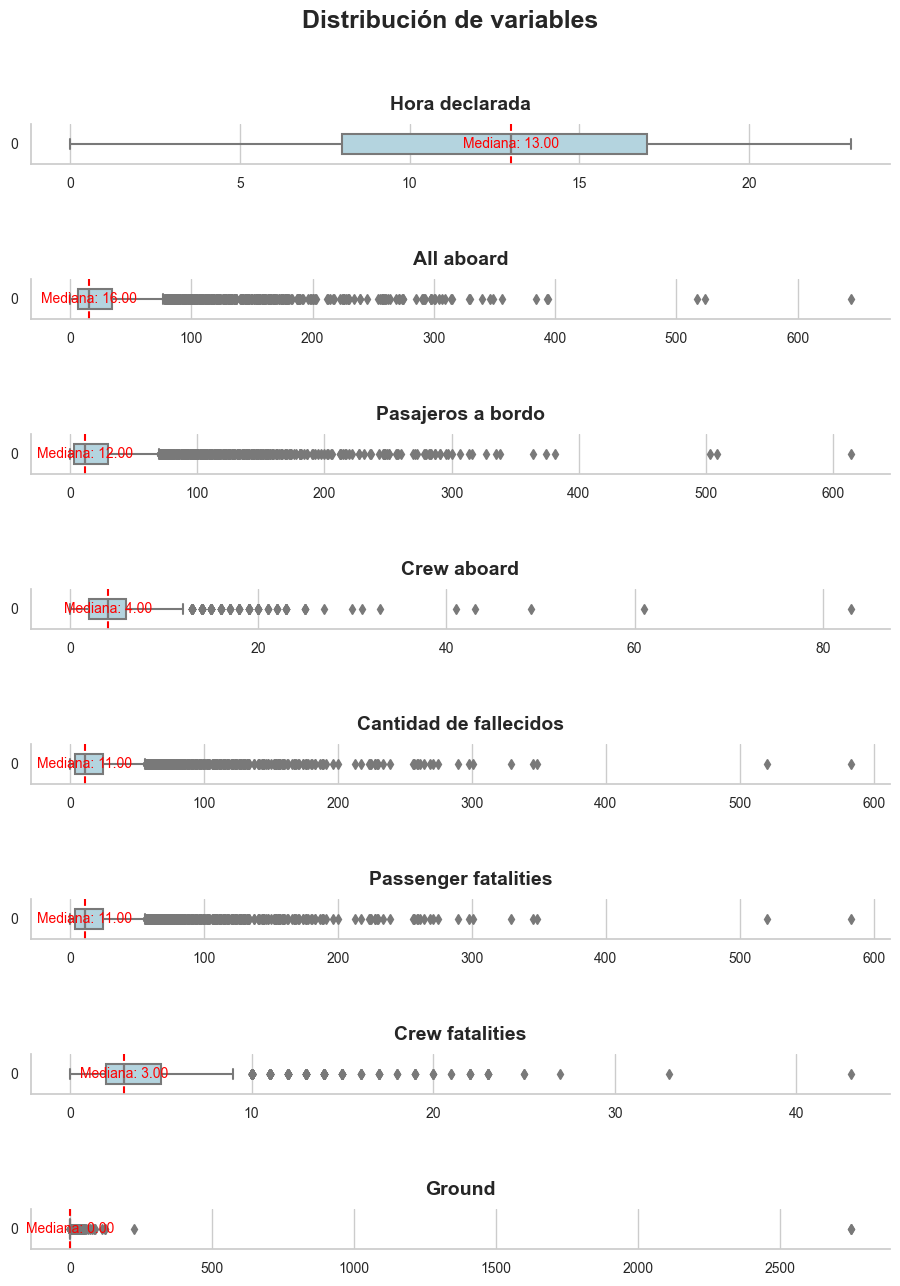

In [26]:
# Variables que deseas incluir en el diagrama de cajas
variables = ['HORA declarada', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=len(variables), figsize=(10, 13))

# Generar el diagrama de caja para cada variable
for i, variable in enumerate(variables):
    sns.boxplot(data=df[variable], ax=axes[i], orient='h', color='lightblue', width=0.5, linewidth=1.5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(variable.capitalize().replace('_', ' '), fontsize=14, fontweight='bold', pad=10)

    # Añadir una línea vertical en la mediana
    median = df[variable].median()
    axes[i].axvline(median, color='red', linestyle='--', linewidth=1.5)

    # Añadir texto con la mediana
    axes[i].text(median, 0.5, f'Mediana: {median:.2f}', transform=axes[i].get_xaxis_transform(), ha='center', va='center', color='red', fontsize=10)

# Ajustar el espaciado entre subplots
fig.tight_layout(pad=3)

# Añadir un título a la figura
fig.suptitle('Distribución de variables', fontsize=18, fontweight='bold', y=1.02)

# Mostrar los gráficos
plt.show()

### - Categóricas

In [27]:
df.describe(include=object)

,fecha,Ruta,OperadOR,route,ac_type,registration,cn_ln,summary,ac_type_clasif1,ac_type_clasif2,Ruta_pais,Ruta_continente
count,5008,5003,4998,3997,4994,4736,4341,4949,4978,4978,4985,4985
unique,4577,4124,2267,3758,2467,4700,3907,4857,23,5,217,14
top,1988-08-31,"Moscow, Russia",Aeroflot,Sao Paulo - Rio de Janeiro,Douglas DC-3,49,1,Crashed under unknown circumstances.,Avión militar,Avión,United States,Americas
freq,4,16,253,7,333,3,8,9,1736,4678,1060,2059


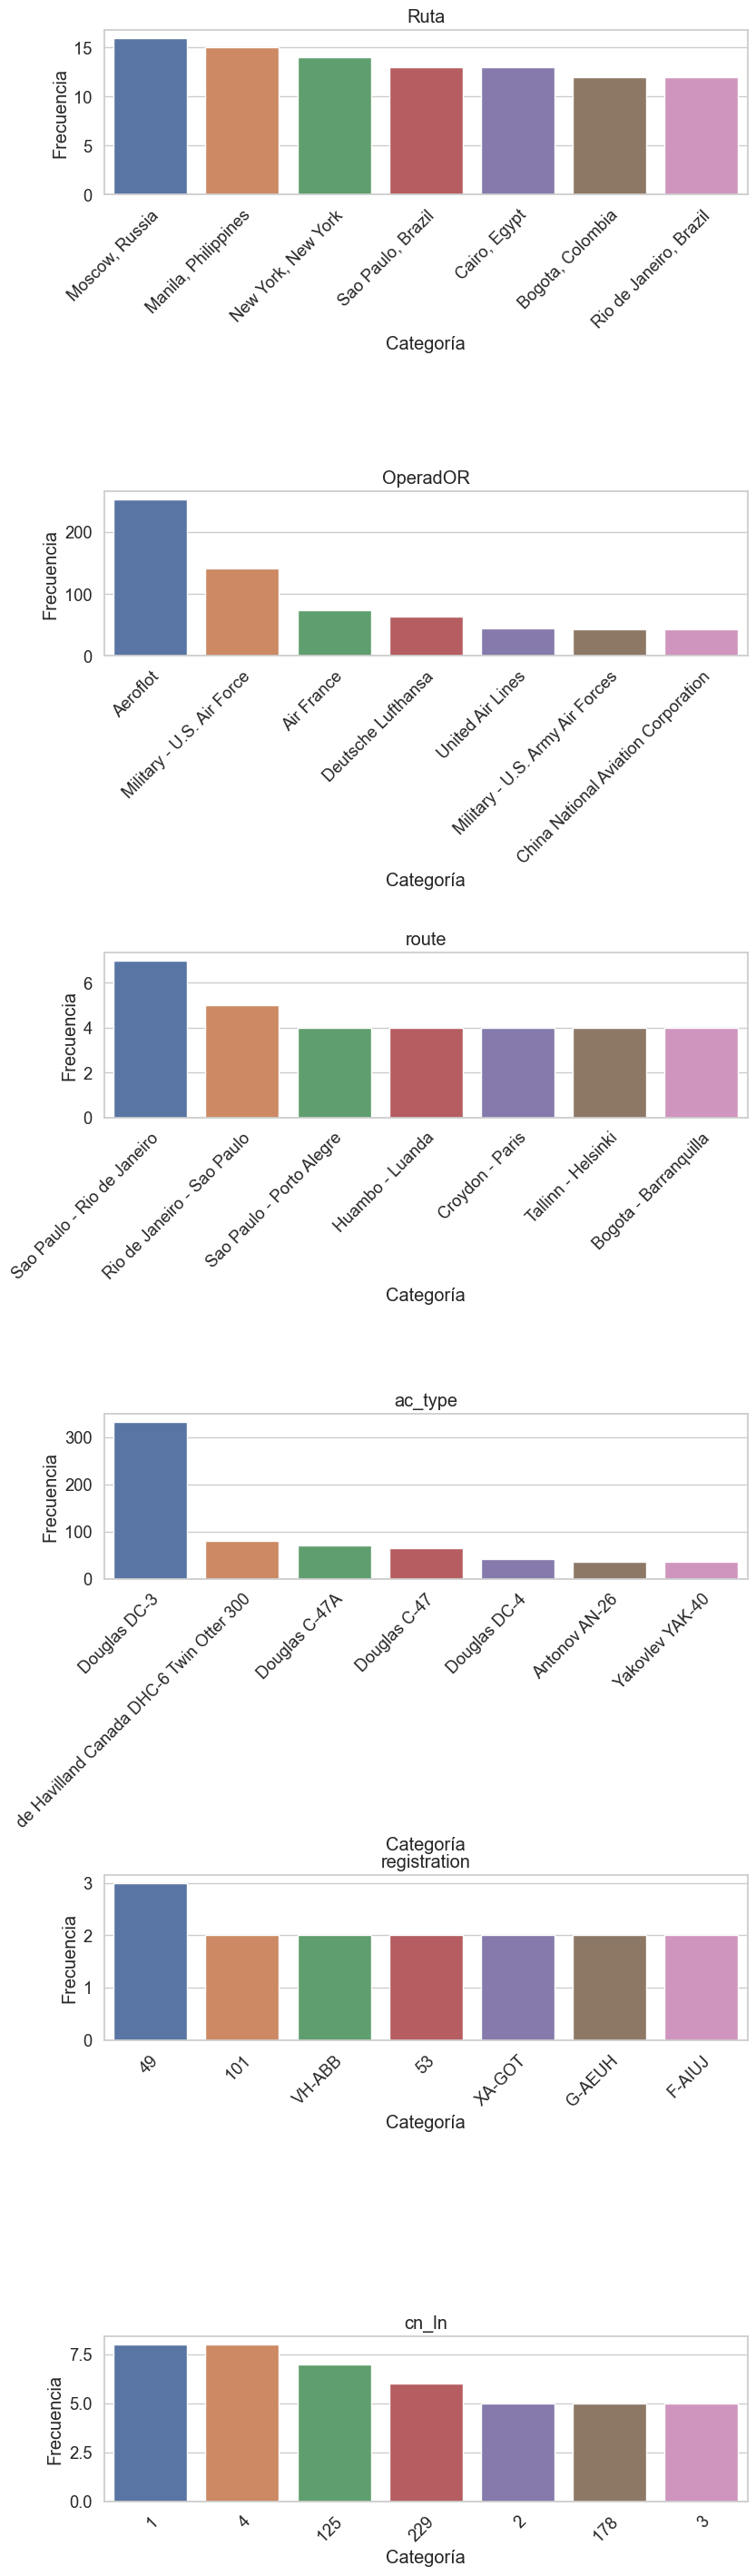

In [28]:
# Variables categóricas
categorical_variables = ['Ruta', 'OperadOR', 'route', 'ac_type', 'registration', 'cn_ln']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Ajustar tamaño de la figura
fig, axs = plt.subplots(len(categorical_variables), 1, figsize=(10, len(categorical_variables)*5))
fig.tight_layout(pad=6)

# Generar gráficos univariados para cada variable
for i, variable in enumerate(categorical_variables):
    # Seleccionar el eje correspondiente
    ax = axs[i]
    
    # Contar la frecuencia de cada categoría y ordenarlas
    category_counts = df[variable].value_counts().sort_values(ascending=False)
    
    # Seleccionar los 7 valores más frecuentes
    top_categories = category_counts.head(7)
    
    # Graficar barras de frecuencia con Seaborn
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation_mode='anchor', ha='right')  # Rotar y alinear los ticks del eje x

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(hspace=1.8)

# Mostrar el subplot
plt.show()

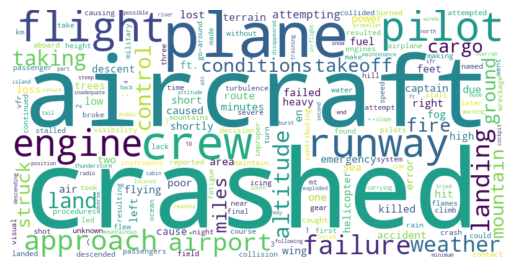

In [29]:
# Visualizamos las palabras claves de la columna 'summary' que tienen mayor frecuencia
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Descargar los recursos necesarios de NLTK
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Eliminar los valores nulos de la columna 'summary'
df_summary = df.dropna(subset=['summary'])

# Texto de la columna 'summary' de tu DataFrame 'df'
text = ' '.join(df_summary['summary'].tolist())

# Tokenizar el texto y eliminar las stopwords y los signos de puntuación
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', "'s"])
tokens = [token.lower() for token in word_tokenize(text) if not token.lower() in stop_words]

# Eliminar las stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if not token.lower() in stop_words]

# Crear un diccionario con la frecuencia de cada palabra
freq_dist = nltk.FreqDist(tokens)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

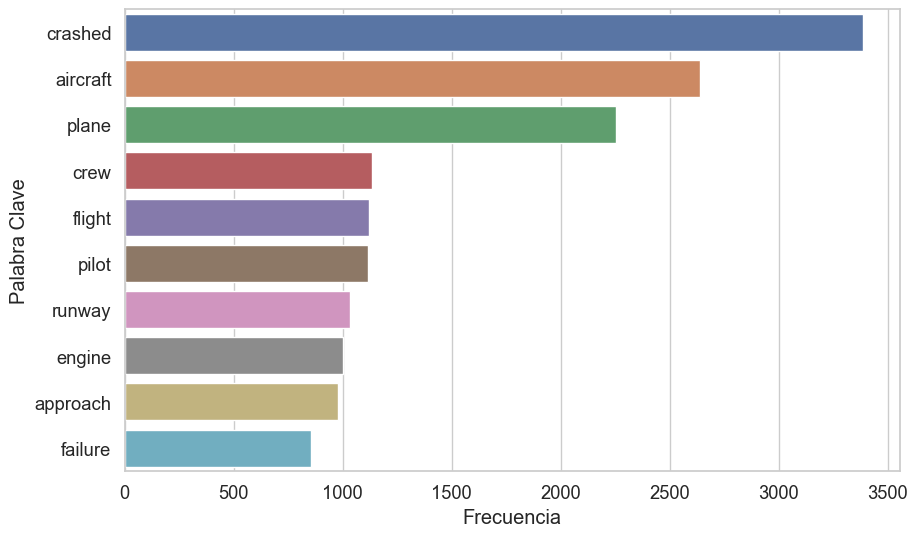

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Descargar los recursos necesarios de NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Eliminar los valores nulos de la columna 'summary'
df_summary = df.dropna(subset=['summary'])

# Texto de la columna 'summary' de tu DataFrame 'df_summary'
text = ' '.join(df_summary['summary'].tolist())

# Tokenizar el texto y eliminar las stopwords y los signos de puntuación
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', "'s"])
tokens = [token.lower() for token in word_tokenize(text) if not token.lower() in stop_words]

# Obtener las 10 palabras más comunes
most_common_words = Counter(tokens).most_common(10)

# Extraer las palabras y las frecuencias en listas separadas
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar barras de frecuencia con Seaborn
sns.barplot(x=frequencies, y=words, ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Palabra Clave')

# Mostrar el gráfico
plt.show()


### **Análisis Bivariado** 

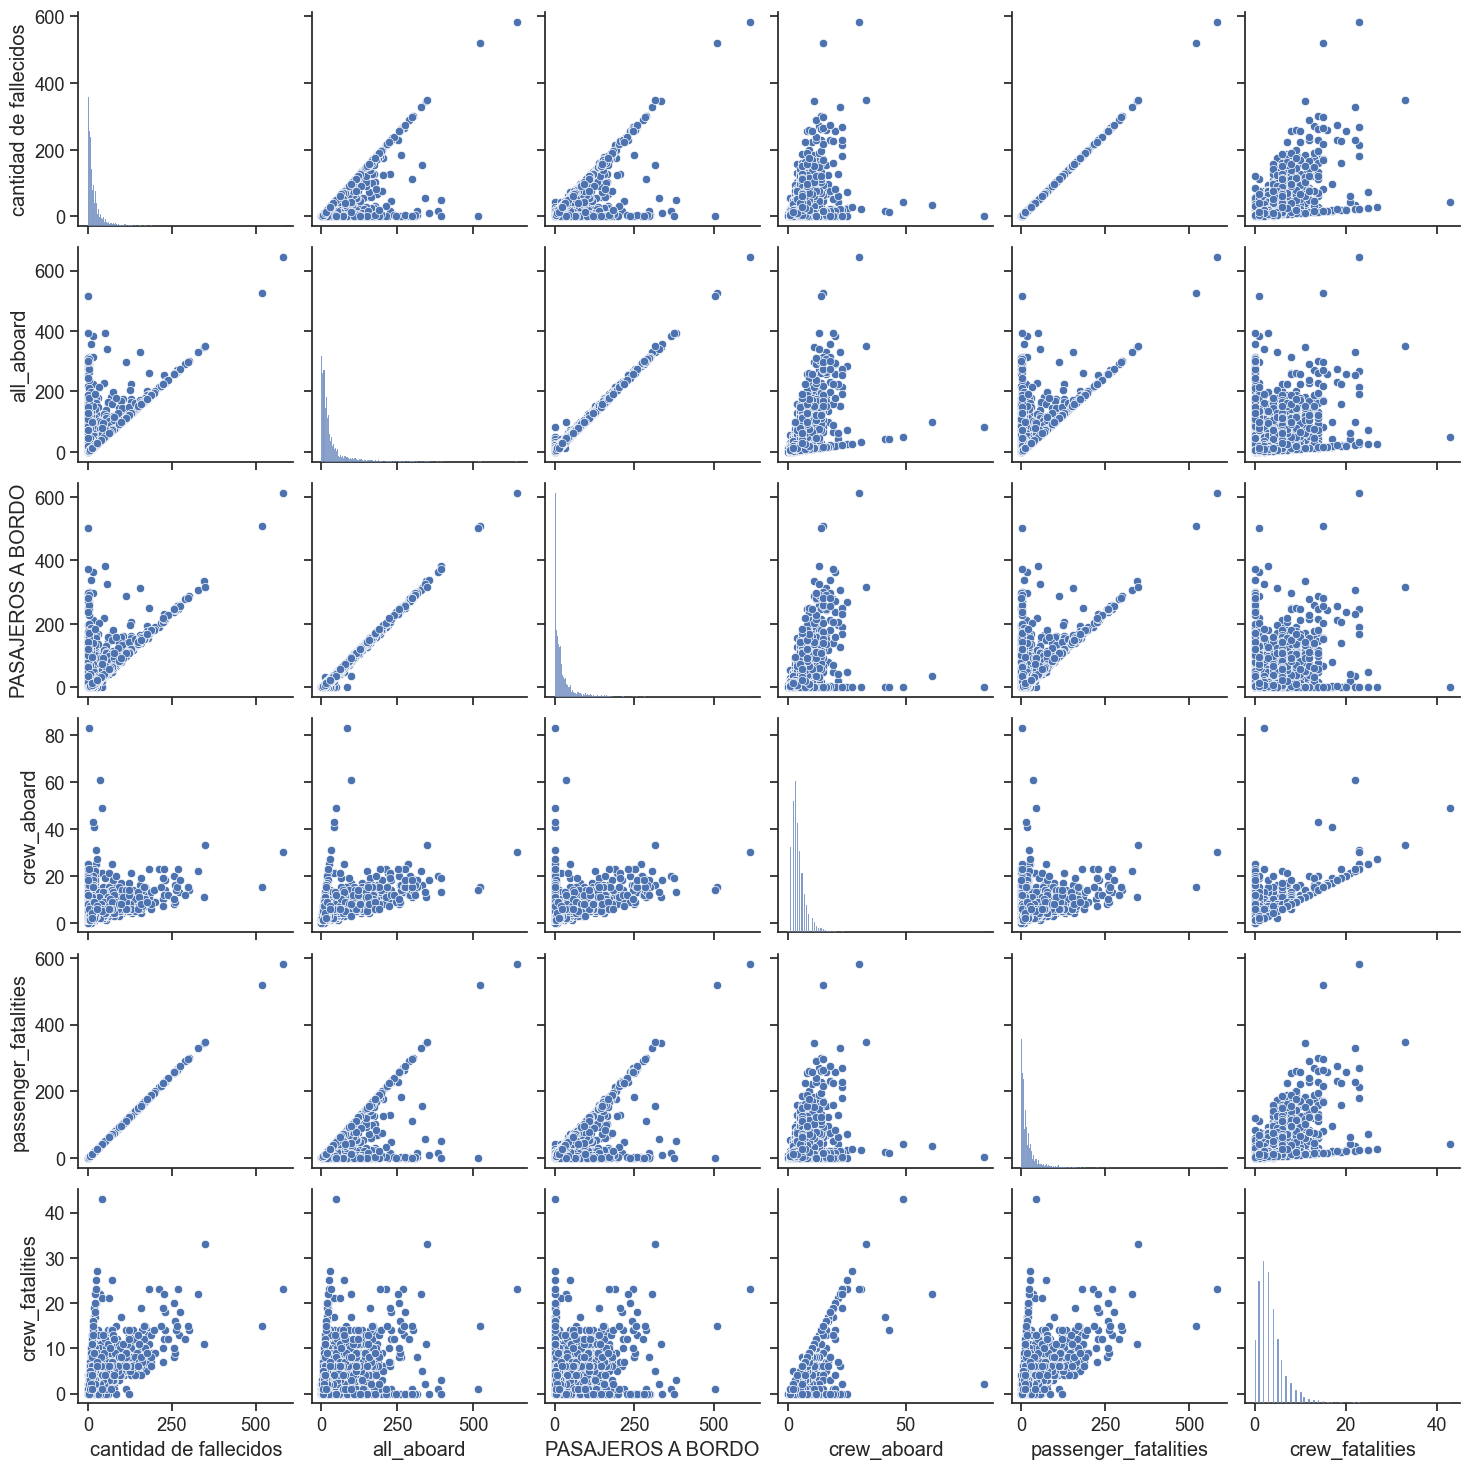

In [31]:
# Matriz de dispersión
# Seleccionar las variables numéricas relevantes
df_filtered = df[['cantidad de fallecidos', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'passenger_fatalities', 'crew_fatalities']]

# Eliminar filas con valores nulos en las variables seleccionadas
df_filtered = df_filtered.dropna()

# Configurar estilo de Seaborn
sns.set(style="ticks", font_scale=1.2)

# Crear matriz de dispersión
sns.pairplot(df_filtered)

# Mostrar la matriz de dispersión
plt.show()

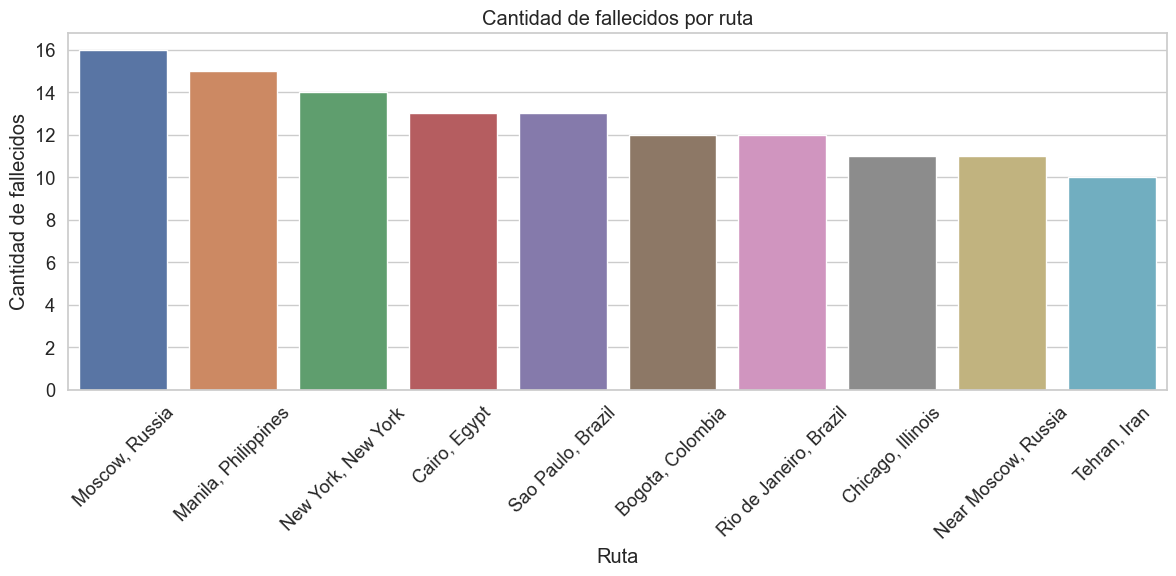

In [32]:
# Gráfico de barras: Comparación entre Ruta (Top 10) y Cantidad de Fallecidos

# Filtrar columnas relevantes
df_filtered = df[['Ruta', 'cantidad de fallecidos']]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_filtered = df_filtered.dropna()

# Obtener las 10 rutas principales por frecuencia de datos
top_10_rutas = df_filtered['Ruta'].value_counts().sort_values(ascending=False).head(10).index

# Filtrar el DataFrame solo para las 10 rutas principales
df_top_10_rutas = df_filtered[df_filtered['Ruta'].isin(top_10_rutas)]

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar barras de frecuencia de datos por ruta (solo las 10 principales)
sns.countplot(x='Ruta', data=df_top_10_rutas, ax=ax, order=top_10_rutas)

# Configurar etiquetas y título
ax.set_title('Cantidad de fallecidos por ruta')
ax.set_xlabel('Ruta')
ax.set_ylabel('Cantidad de fallecidos')

# Rotar y ajustar los ticks del eje x
ax.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


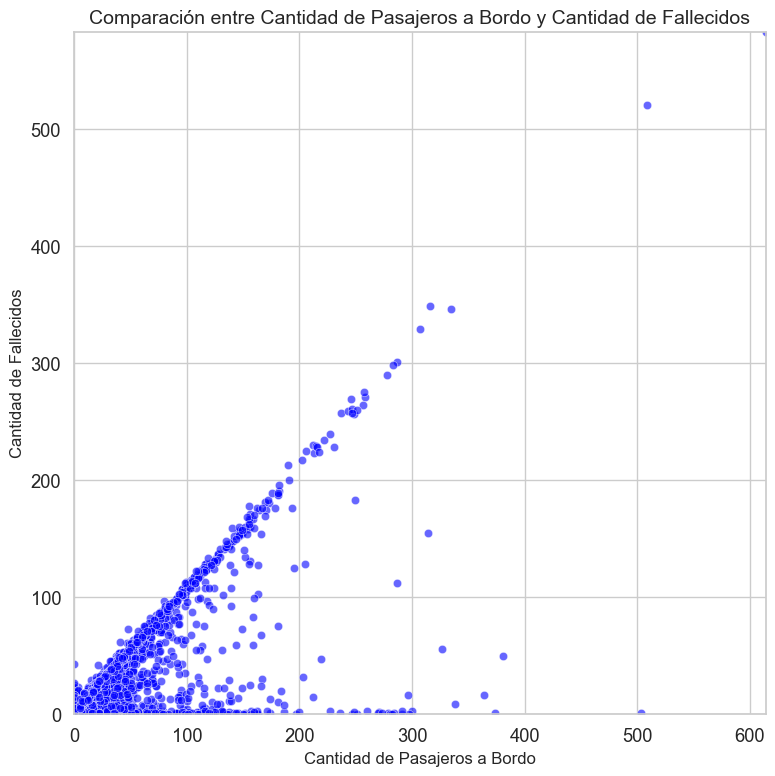

In [33]:
# Filtrar columnas relevantes
df_filtered = df[['PASAJEROS A BORDO', 'cantidad de fallecidos']]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_filtered = df_filtered.dropna()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 8))

# Graficar dispersión de cantidad de fallecidos por cantidad de pasajeros a bordo
sns.scatterplot(x='PASAJEROS A BORDO', y='cantidad de fallecidos', data=df_filtered, ax=ax, alpha=0.6, color='blue')

# Configurar etiquetas y título
ax.set_xlabel('Cantidad de Pasajeros a Bordo', fontsize=12)
ax.set_ylabel('Cantidad de Fallecidos', fontsize=12)
ax.set_title('Comparación entre Cantidad de Pasajeros a Bordo y Cantidad de Fallecidos', fontsize=14)

# Ajustar límites de los ejes
ax.set_xlim(0, df_filtered['PASAJEROS A BORDO'].max())
ax.set_ylim(0, df_filtered['cantidad de fallecidos'].max())

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Análisis Multivariado

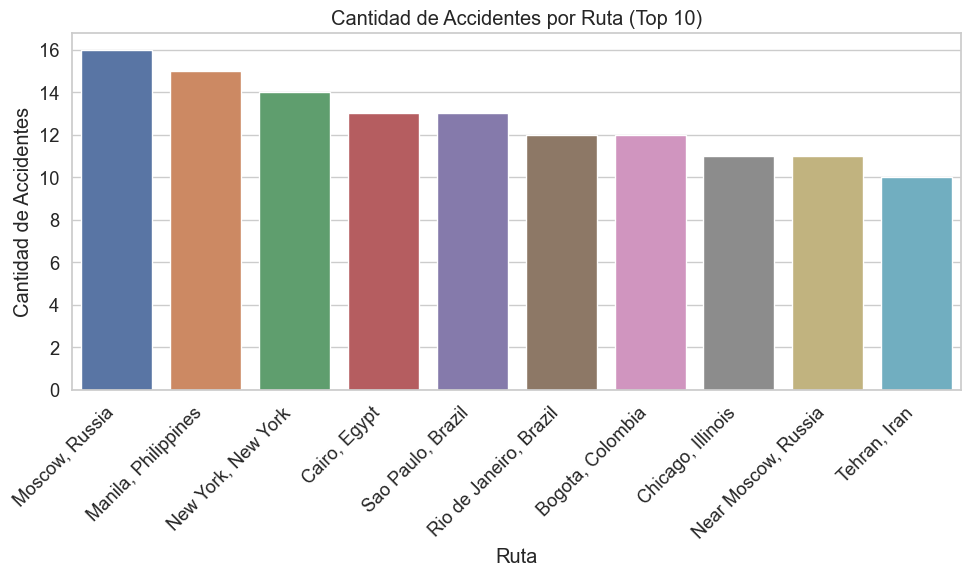

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las 10 rutas principales por cantidad de accidentes
top_10_rutas = df['Ruta'].value_counts().nlargest(10).index

# Filtrar el DataFrame solo para las 10 rutas principales
df_filtered = df[df['Ruta'].isin(top_10_rutas)]

# Contar la cantidad de accidentes por ruta
df_counts = df_filtered['Ruta'].value_counts().reset_index()
df_counts.columns = ['Ruta', 'Cantidad de Accidentes']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar barras de cantidad de accidentes por ruta (solo las 10 principales)
sns.barplot(x='Ruta', y='Cantidad de Accidentes', data=df_counts, ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Ruta')
ax.set_ylabel('Cantidad de Accidentes')
ax.set_title('Cantidad de Accidentes por Ruta (Top 10)')

# Rotar y ajustar los ticks del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


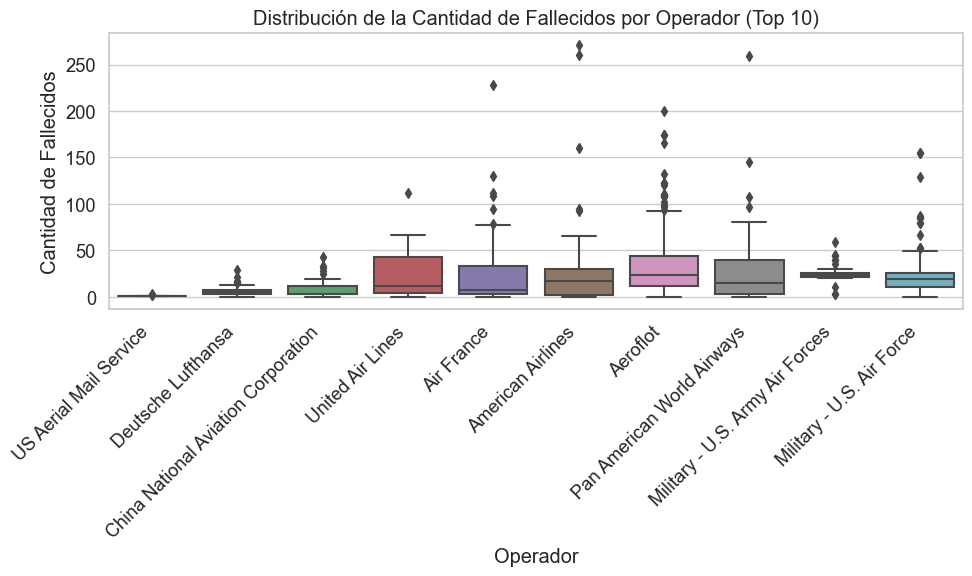

In [35]:
# Gráfico de caja (box plot) de la cantidad de fallecidos por Operador:

# Obtener los top 10 OperadOR con mayor cantidad de fallecidos
top_10_operadores = df['OperadOR'].value_counts().nlargest(10).index

# Filtrar el DataFrame solo para los top 10 OperadOR
df_filtered = df[df['OperadOR'].isin(top_10_operadores)][['OperadOR', 'cantidad de fallecidos']].dropna()

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar boxplot de la cantidad de fallecidos por OperadOR (top 10)
sns.boxplot(x='OperadOR', y='cantidad de fallecidos', data=df_filtered, ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Operador')
ax.set_ylabel('Cantidad de Fallecidos')
ax.set_title('Distribución de la Cantidad de Fallecidos por Operador (Top 10)')

# Rotar y ajustar los ticks del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
